In [1]:
import os, sys
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
# So we can see the output of multiple variables in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import tensorflow as tf
tf.__version__

from IPython.display import clear_output, Image, display, HTML


In [2]:
sys.platform

'darwin'

In [3]:
gt_images = 'data/data_road/training/gt_image_2'
os.listdir(gt_images)

['um_road_000087.png',
 'um_road_000093.png',
 'um_road_000044.png',
 'um_road_000050.png',
 'um_road_000078.png',
 'uu_road_000073.png',
 'uu_road_000067.png',
 'umm_road_000007.png',
 'um_lane_000059.png',
 'umm_road_000013.png',
 'um_lane_000071.png',
 'um_lane_000065.png',
 'um_lane_000064.png',
 'um_lane_000070.png',
 'um_lane_000058.png',
 'umm_road_000012.png',
 'umm_road_000006.png',
 'uu_road_000066.png',
 'uu_road_000072.png',
 'um_road_000079.png',
 'um_road_000051.png',
 'um_road_000045.png',
 'um_road_000092.png',
 'um_road_000086.png',
 'um_road_000090.png',
 'um_road_000084.png',
 'um_road_000053.png',
 'um_road_000047.png',
 'uu_road_000058.png',
 'uu_road_000064.png',
 'uu_road_000070.png',
 'umm_road_000010.png',
 'umm_road_000004.png',
 'um_lane_000066.png',
 'um_lane_000072.png',
 'umm_road_000038.png',
 'um_lane_000073.png',
 'umm_road_000039.png',
 'um_lane_000067.png',
 'umm_road_000005.png',
 'umm_road_000011.png',
 'uu_road_000071.png',
 'uu_road_000065.png',
 

In [4]:
gt_images = glob(gt_images + '/*.png')


(370, 1226, 3)

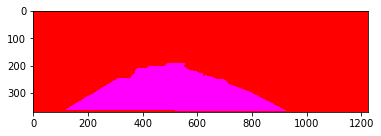

In [5]:
img = gt_images[0]
img = plt.imread(img)
img.shape
plt.imshow(img)

In [6]:
import helper
import config

data_folder = config.path_train_images

In [7]:
get_batches_fn = helper.gen_batch_function(data_folder, (config.image_shape.y, config.image_shape.x))

get_batches_fn(1)

img, gt = next(get_batches_fn(1))
img.shape
gt.shape

<generator object gen_batch_function.<locals>.get_batches_fn at 0x11af907d8>

(1, 160, 576, 3)

(1, 160, 576, 2)

(160, 576, 2)

(92160, 2)

(160, 576, 2)

(160, 576)

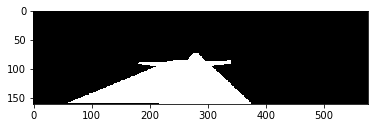

(92160,)

(160, 576)

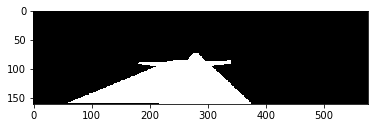

In [8]:
gt_00 = gt[0]
gt_00.shape

gt_01 = gt_00.reshape(-1, 2)
gt_01.shape

gt_02 = gt_01.reshape(160,576, -1)
gt_02.shape

gt_03 = gt_02[:,:,1]
gt_03.shape

plt.imshow(gt_03, cmap='gray'); plt.show()

gt_04 = gt_01[:, 1]
gt_04.shape

gt_05 = gt_04.reshape(160, 576)
gt_05.shape

plt.imshow(gt_05, cmap='gray'); plt.show()

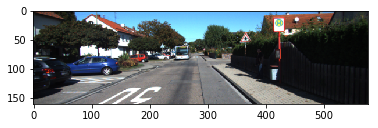

(160, 576)

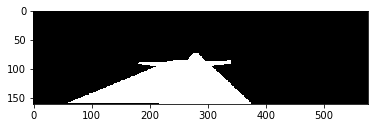

(160, 576)

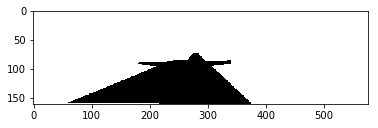

(92160, 2)

(160, 576, 2)

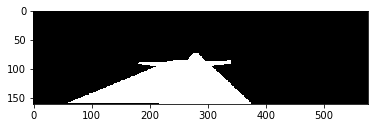

In [9]:
plt.imshow(img[0]); plt.show()

gt1 = gt[0][:,:,1]
gt1.shape
plt.imshow(gt1, cmap='gray'); plt.show()

gt0 = gt[0][:,:,0]
gt0.shape
plt.imshow(gt0, cmap='gray'); plt.show()

gt_reshape = gt[0].reshape(-1, 2)
gt_reshape.shape

gt_undo = gt_reshape.reshape(config.image_shape.y, config.image_shape.x, -2)
gt_undo.shape
gt_undo1 = gt_undo[:,:, 1]
plt.imshow(gt_undo1, cmap='gray'); plt.show()

In [10]:
os.listdir('.')

['project_tests.py',
 '.DS_Store',
 'config.py',
 '__pycache__',
 'test.py',
 'foo.ipynb',
 'README.md',
 'img',
 '.gitignore',
 'sandbox',
 'tensorboard',
 'model',
 'helper.py',
 'movie.py',
 '.ipynb_checkpoints',
 '.git',
 'main.py',
 'data',
 'runs']

In [11]:
os.listdir('model')

['checkpoint',
 'epoch_000.data-00000-of-00001',
 'model-10epochs.zip',
 'epoch_000.index',
 'model-10epochs-snoopminer',
 'epoch_000.meta']

```python

saver = tf.train.import_meta_graph()
saver.restore()

tf.Graph()

graph_def = tf.GraphDef()

tf.import_graph_def()
    
# assign the graph to `graph`
graph = tf.get_default_graph()
tf.get_defaut_graph().as_graph_def()
    
meta_graph_def = tf.saved_model.loader.load(sess, [vgg_tag], vgg_path)

image_input = graph.get_tensor_by_name(vgg_input_tensor_name)
```

In [19]:
tf.reset_default_graph()

model_meta_path = 'model/model-10epochs-snoopminer/cpu-trained-mac-epoch-9.meta'
model_checkpoint = '/'.join(model_meta_path.split('/')[:-1])
model_checkpoint
imported_meta = tf.train.import_meta_graph(model_meta_path)

'model/model-10epochs-snoopminer'

The current graph could be explored using the following command ```tf.get_default_graph()```

In [20]:
img, gt = next(get_batches_fn(1))

with tf.Session() as sess:
    # Restore the varialbes
    # The variables to restore do not have to have been initialized, 
    # as restoring is itself a way to initialize variables.
    imported_meta.restore(sess, tf.train.latest_checkpoint(model_checkpoint))
    
    # Now that we restored the graph (above), we need a handle to it like so:
    graph = tf.get_default_graph()
    
    train_op = graph.get_operation_by_name('train_op')
    image_input = graph.get_tensor_by_name('image_input:0')
    correct_label = graph.get_tensor_by_name('correct_label_holder:0')
    keep_prob = graph.get_tensor_by_name('keep_prob:0')
    logits = graph.get_tensor_by_name('logits:0')
    
#     sess.run(train_op, feed_dict={image_input: img,
#                                   correct_label: gt,
#                                   keep_prob: 1.0})
    
    im_softmax = sess.run(
        [tf.nn.softmax(logits)],
        {keep_prob: 1.0, 
         image_input: img,
           correct_label: gt
        })
    
#     print(dir(logits))
#     print(logits.eval({image_input: img,
#                        keep_prob: 1.0,
#                        correct_label: gt}))

    print(im_softmax)
    print(image_input.get_shape())

INFO:tensorflow:Restoring parameters from model/model-10epochs-snoopminer/cpu-trained-mac-epoch-9


KeyError: "The name 'train_op' refers to an Operation not in the graph."

(160, 576)

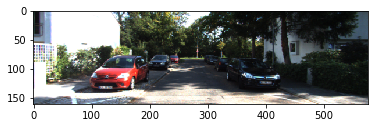

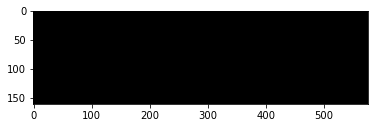

In [65]:
im_softmax_00 = im_softmax[0].reshape(160,576)
im_softmax_00.shape

plt.imshow(img[0]); plt.show()
plt.imshow(im_softmax_00, cmap='gray')

In [14]:
# make sure you have a handle to the Graph object that is imported
tf.summary.FileWriter("tensorboard", graph).close()

In [26]:
keep_prob = graph.get_tensor_by_name('keep_prob:0')
keep_prob
train_op = graph.get_operation_by_name('train_op')
dir(train_op)
train_op.op_def

<tf.Tensor 'keep_prob:0' shape=<unknown> dtype=float32>

['_InputList',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_control_input',
 '_add_control_inputs',
 '_add_input',
 '_c_op',
 '_control_flow_context',
 '_control_inputs',
 '_create_c_op',
 '_get_control_flow_context',
 '_graph',
 '_id',
 '_id_value',
 '_input_dtypes',
 '_input_types',
 '_input_types_val',
 '_inputs',
 '_node_def',
 '_op_def',
 '_original_op',
 '_output_types',
 '_output_types_val',
 '_outputs',
 '_recompute_node_def',
 '_reconstruct_sequence_inputs',
 '_set_control_flow_context',
 '_set_device',
 '_tf_input',
 '_tf_output',
 '_traceback',
 '_update_input',
 'colocation_groups',
 'control_inputs',
 'device',
 'get_attr',
 'graph',
 'inputs',
 '

name: "NoOp"

In [33]:
for n in graph.as_graph_def().node:
    if 'logits' in n.name:
        print(n.name)

logits
gradients/logits_grad/ExpandDims/dim
gradients/logits_grad/ExpandDims
gradients/logits_grad/mul


In [21]:
for op in graph.get_operations():
    if 'output_layer' in op.name:
        print(op.name)